In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQL Server
conn = pyodbc.connect(
    'Driver={SQL Server};'
    'Server=Precious;'
    'Database=Ecommerce_db;'
    'Trusted_Connection=yes;'
)

# Load data
query = "SELECT * FROM E_commerce;"
df = pd.read_sql(query, conn)

print("✅ Data successfully loaded!")
print(df.head())

C:\Users\hezek\AppData\Local\Temp\ipykernel_21180\4144462871.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


✅ Data successfully loaded!
  InvoiceNo                          Description  Quantity  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365                  WHITE METAL LANTERN         6   
2    536365       CREAM CUPID HEARTS COAT HANGER         8   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6   

                   InvoiceDate  CustomerID         Country StockCode  \
0  2010-12-01 08:26:00.0000000     17850.0  United Kingdom     85123   
1  2010-12-01 08:26:00.0000000     17850.0  United Kingdom     71053   
2  2010-12-01 08:26:00.0000000     17850.0  United Kingdom     84406   
3  2010-12-01 08:26:00.0000000     17850.0  United Kingdom     84029   
4  2010-12-01 08:26:00.0000000     17850.0  United Kingdom     84029   

   UnitPrice  
0       2.55  
1       3.39  
2       2.75  
3       3.39  
4       3.39  


In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538914 entries, 0 to 538913
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    538914 non-null  object 
 1   Description  537475 non-null  object 
 2   Quantity     538914 non-null  int64  
 3   InvoiceDate  538914 non-null  object 
 4   CustomerID   404909 non-null  float64
 5   Country      538914 non-null  object 
 6   StockCode    538914 non-null  object 
 7   UnitPrice    538914 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 32.9+ MB
None
            Quantity     CustomerID      UnitPrice
count  538914.000000  404909.000000  538914.000000
mean        9.586116   15295.168304       3.268824
std       218.631895    1710.424057       4.492279
min    -80995.000000   12346.000000       0.000000
25%         1.000000   13969.000000       1.250000
50%         3.000000   15159.000000       2.080000
75%        10.000000   16794.000000

In [5]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']


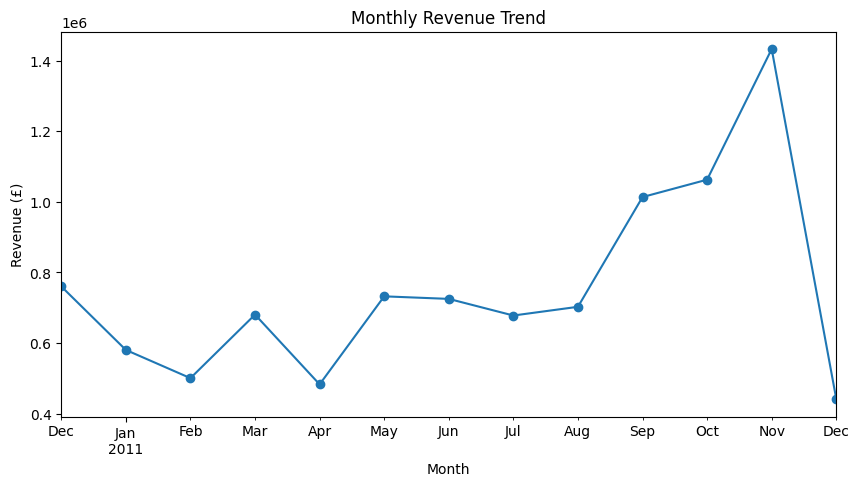

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
monthly_revenue = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue (£)')
plt.show()

plt.savefig("top_products.png", dpi=300, bbox_inches='tight')
plt.show()


In [1]:
plt.savefig("top_products.png", dpi=300, bbox_inches='tight')
plt.show()


NameError: name 'plt' is not defined

C:\Users\hezek\AppData\Local\Temp\ipykernel_9280\4105666354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


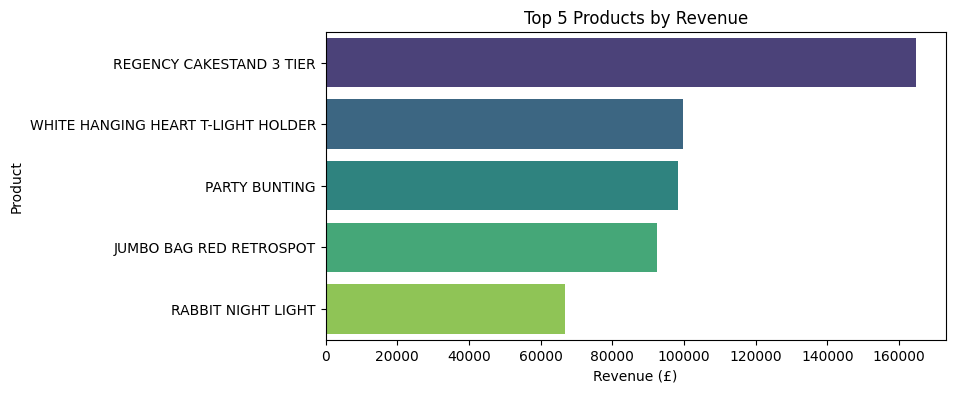

<Figure size 640x480 with 0 Axes>

In [7]:
top_products = df.groupby('Description')['Revenue'].sum().nlargest(5)

plt.figure(figsize=(8,4))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Revenue (£)')
plt.ylabel('Product')
plt.show()

plt.savefig("top_products.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\hezek\AppData\Local\Temp\ipykernel_9280\3050783949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


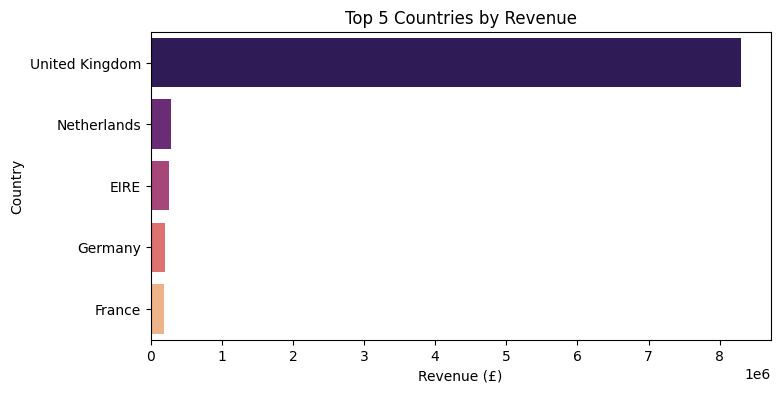

<Figure size 640x480 with 0 Axes>

In [8]:
top_countries = df.groupby('Country')['Revenue'].sum().nlargest(5)

plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 5 Countries by Revenue')
plt.xlabel('Revenue (£)')
plt.ylabel('Country')
plt.show()

plt.savefig("top_products.png", dpi=300, bbox_inches='tight')
plt.show()

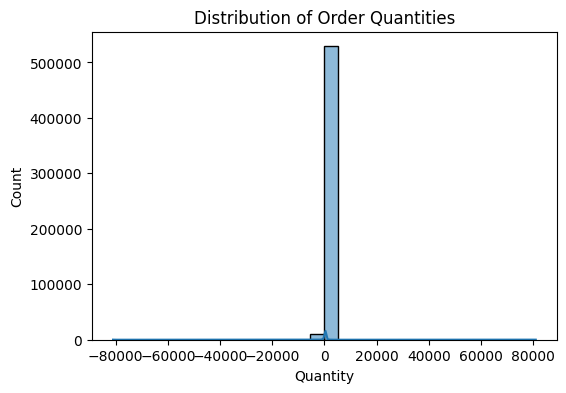

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Distribution of Order Quantities')
plt.show()

plt.savefig("top_products.png", dpi=300, bbox_inches='tight')
plt.show()

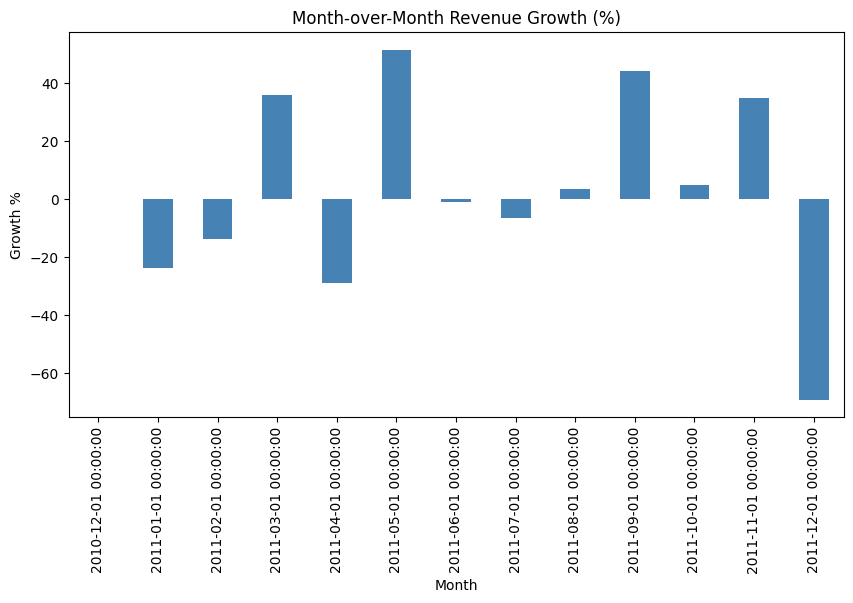

<Figure size 640x480 with 0 Axes>

In [10]:
monthly_revenue = monthly_revenue.to_timestamp()
growth = monthly_revenue.pct_change() * 100

plt.figure(figsize=(10,5))
growth.plot(kind='bar', color='steelblue')
plt.title('Month-over-Month Revenue Growth (%)')
plt.xlabel('Month')
plt.ylabel('Growth %')
plt.show()

plt.savefig("top_products.png", dpi=300, bbox_inches='tight')
plt.show()

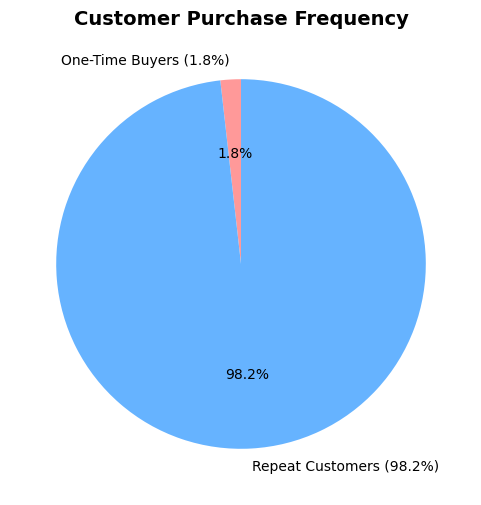

C:\Users\hezek\AppData\Local\Temp\ipykernel_21180\1051216972.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Type', y='Count', data=df, palette='coolwarm')


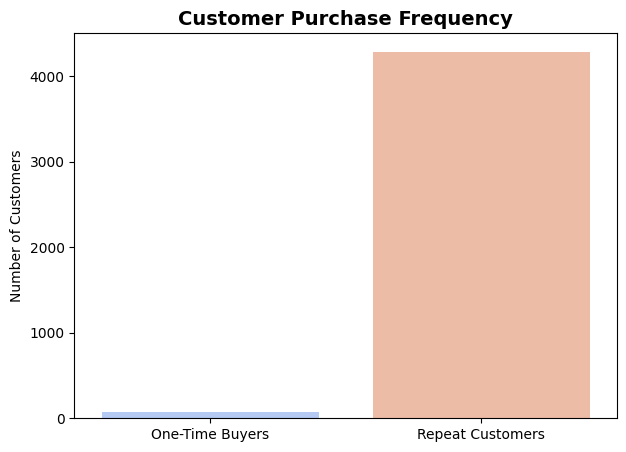

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from your SQL result
data = {
    'Customer Type': ['One-Time Buyers', 'Repeat Customers'],
    'Count': [78, 4286]
}

df = pd.DataFrame(data)
df['Percentage'] = (df['Count'] / df['Count'].sum()) * 100

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(df['Count'], labels=[f"{row['Customer Type']} ({row['Percentage']:.1f}%)" for _, row in df.iterrows()],
        autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Customer Purchase Frequency', fontsize=14, fontweight='bold')
plt.show()

# Optional bar chart version
plt.figure(figsize=(7,5))
sns.barplot(x='Customer Type', y='Count', data=df, palette='coolwarm')
plt.title('Customer Purchase Frequency', fontsize=14, fontweight='bold')
plt.ylabel('Number of Customers')
plt.xlabel('')
plt.show()
